<a href="https://colab.research.google.com/github/vishzzl/Deeplearning_tensor_flow/blob/master/Pnemounia_calssification_using_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kaggle

In [7]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --unzip

100% 2.28G/2.29G [00:40<00:00, 64.3MB/s]
100% 2.29G/2.29G [00:40<00:00, 60.1MB/s]


## Setting the path to the Dataset

In [23]:
import os 
base_dir='/content/chest_xray/chest_xray'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'test')

train_normal_xray_dir=os.path.join(train_dir,'NORMAL')
train_pneumonia_xray_dir=os.path.join(train_dir,'PNEUMONIA')

validation_normal_xray_dir=os.path.join(validation_dir,'NORMAL')
validation_pneumonia_xray_dir=os.path.join(validation_dir,"PNEUMONIA")


## Getting the filenames in the dataset

In [24]:
train_normal_names=os.listdir(train_normal_xray_dir)
train_pneumonia_names=os.listdir(train_pneumonia_xray_dir)

print(train_normal_names[:8])
print(train_pneumonia_names[:8])


['IM-0439-0001.jpeg', 'NORMAL2-IM-0503-0001.jpeg', 'IM-0702-0001.jpeg', 'IM-0215-0001.jpeg', 'NORMAL2-IM-0507-0001.jpeg', 'NORMAL2-IM-0908-0001.jpeg', 'IM-0691-0001.jpeg', 'IM-0326-0001.jpeg']
['person529_bacteria_2230.jpeg', 'person308_virus_630.jpeg', 'person566_virus_1106.jpeg', 'person1222_bacteria_3177.jpeg', 'person281_bacteria_1325.jpeg', 'person1340_virus_2311.jpeg', 'person659_virus_1243.jpeg', 'person353_bacteria_1626.jpeg']


## Finding the Size of dataset( number of images)

In [25]:
print('total training normal X-rays', len(os.listdir(train_normal_xray_dir)))
print('total training pneumonia X-rays', len(os.listdir(train_pneumonia_xray_dir)))

print('total validaiton normal X-ray',len(os.listdir(validation_normal_xray_dir)))
print('total validation pneumonia X-ray',len(os.listdir(validation_pneumonia_xray_dir)))

total training normal X-rays 1342
total training pneumonia X-rays 3876
total validaiton normal X-ray 234
total validation pneumonia xX-ray 390


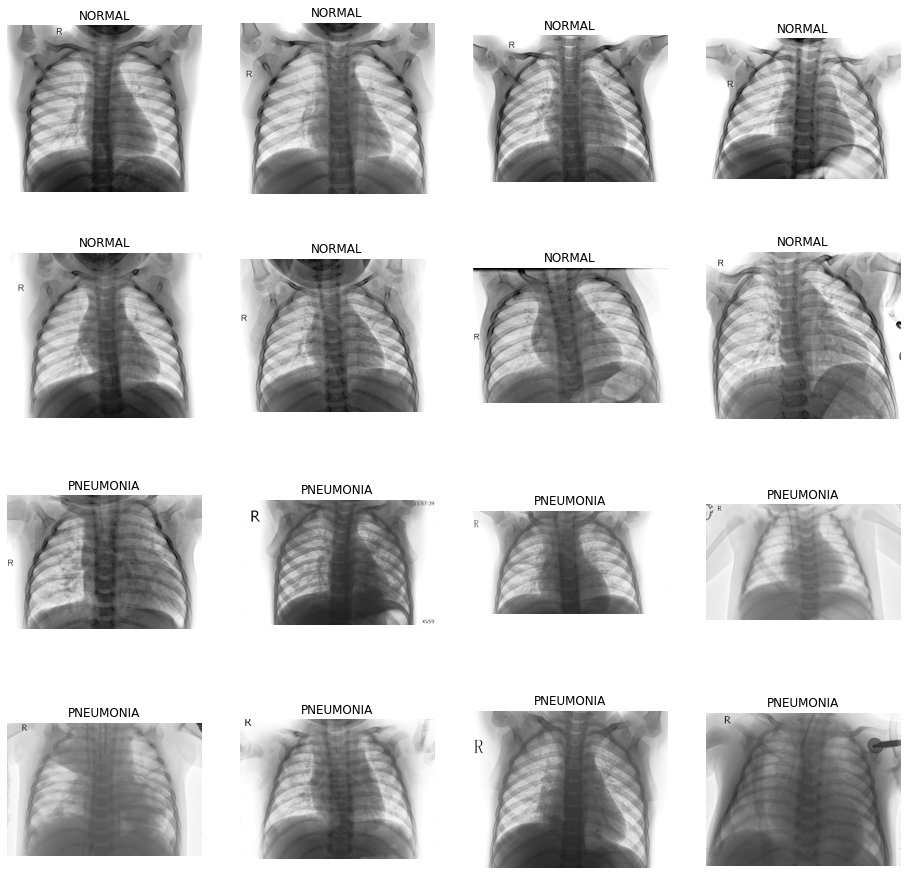

In [39]:
#printing few images from dataset

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_normal_x_ray = [os.path.join(train_normal_xray_dir, fname)
                for fname in train_normal_names[pic_index-8:pic_index] 
               ]

next_pneumonia_x_ray = [os.path.join(train_pneumonia_xray_dir, fname) 
                for fname in train_pneumonia_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_normal_x_ray+next_pneumonia_x_ray):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.title.set_text(img_path.split('/')[-2])
  sp.axis('off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img,cmap='Greys')

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_datagen=ImageDataGenerator()